# Глубинное обучение 1 / Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Часть 2: полносвязные нейронные сети.

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этой части мы будем использовать фреймворк для обучения нейронный сетей, который вы реализовали в первой половине задания. А именно, вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html). Если по какой-то причине вы не сделали первую половину домашки, то **можете поставить все эксперименты на PyTorch**, но рекомендуется использовать ваши реализации модулей.

In [ ]:
import modules as mm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from IPython.display import clear_output

plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [ ]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2023-10-18 15:39:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.txt.zip’

data.txt.zip            [            <=>     ] 201.24M  87.6MB/s    in 2.3s    

2023-10-18 15:39:50 (87.6 MB/s) - ‘data.txt.zip’ saved [211011981]



In [ ]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


Посмотрим на статистики по данным.

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

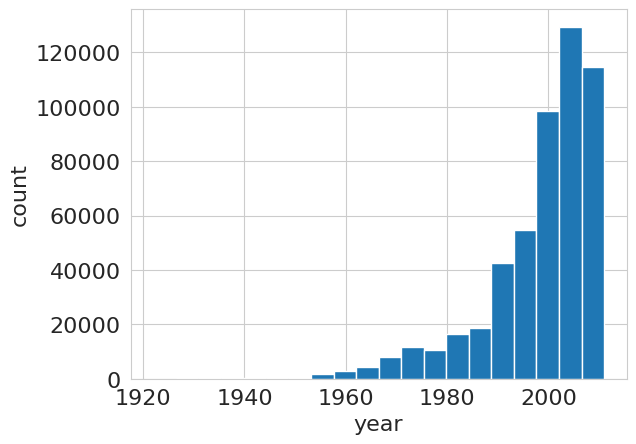

Range: 1922 - 2011
Unique values: 89


In [ ]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model1 = Ridge()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, np.zeros(y_test.shape)+y_test.mean()))

89.74966397222076
117.6182574102307


Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты.

In [ ]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    """
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    """
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if np.max(train_losses) / np.min(train_losses) > 10:
        axs[0].set_yscale('log')

    if np.max(train_metrics) / np.min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True):
    """
    Train and validate neural network
      - model: neural network (mm.Module) to train
      - optimizer: optimizer (mm.Optimizer) chained to a model
      - criterion: loss function class (mm.Criterion)
      - metrics: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: mm.DataLoader with train set
      - val_loader: mm.DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    """
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for X_batch, y_batch in pbar:
            '''
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do forward and backward passes
            predictions = ...
            loss = ...
            '''

            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            dldf = criterion.backward(predictions, y_batch)
            model.backward(X_batch, dldf)
            optimizer.step()

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})

        train_losses += [running_loss / train_loader.num_samples()]
        train_metrics += [running_metric / train_loader.num_samples()]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader

        for X_batch, y_batch in pbar:
            '''
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do evaluation
            predictions = ...
            loss = ...
            '''

            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                pbar.set_postfix({'loss': loss, 'MSE': metric_value})

        val_losses += [running_loss / val_loader.num_samples()]
        val_metrics += [running_metric / val_loader.num_samples()]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f'Train loss: {train_losses[-1]:.3f}')
        print(f'Train MSE: {train_metrics[-1]:.3f}')
        print(f'Validation loss: {val_losses[-1]:.3f}')
        print(f'Validation MSE: {val_metrics[-1]:.3f}')

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением логита).

Сначала преобразуем таргет

In [ ]:
y_train_copy = y_train.copy()
y_train_copy = (y_train_copy - y_train_copy.min()).reshape(-1,1)

y_val_copy = y_val.copy()
y_val_copy = (y_val_copy - y_val_copy.min()).reshape(-1,1)

In [ ]:
batch_size = 64
in_features = X_train.shape[1]
hidden_size = 128
out_features = y_train.max() - y_train.min() + 1
num_epochs = 4

In [ ]:
train_loader = mm.DataLoader(X_train, y_train_copy, batch_size, shuffle=True)
val_loader = mm.DataLoader(X_val, y_val_copy, batch_size, shuffle=False)
model2 = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features))
optimizer = mm.SGD(model2, lr=1e-3)
criterion = mm.CrossEntropyLoss()
metric = lambda predictions, y_batch: mean_squared_error(np.argmax(predictions, axis=1), y_batch)

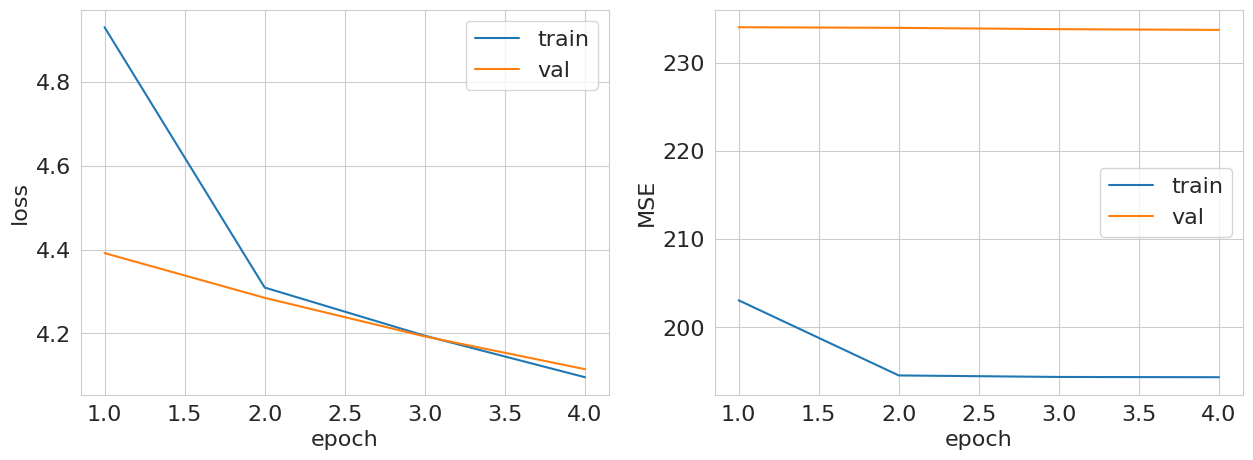

Train loss: 4.095
Train MSE: 194.335
Validation loss: 4.115
Validation MSE: 233.720


In [ ]:
train_mse, val_mse = train_and_validate(model2, optimizer, criterion, metric, train_loader, val_loader, num_epochs)

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Бейзлайн побить не удалось. Есть предположение, что обучать классификатор не лучшая идея, потому что классы распределены слишком неравномерно: за условные 2001-2005 года больше наблюдений, чем за весь 20 век.

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [ ]:
batch_size = 64
in_features = X_train.shape[1]
hidden_size = 128
out_features = 1
num_epochs = 4

In [ ]:
train_loader = mm.DataLoader(X_train, y_train.reshape(-1,1), batch_size, shuffle=True)
val_loader = mm.DataLoader(X_val, y_val.reshape(-1,1), batch_size, shuffle=False)
model3 = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features))
optimizer = mm.SGD(model3, lr=1e-5) # при 1e-3 содержались NaN(в душе не ебу, как такое возможно)
criterion = mm.MSELoss()
metric = lambda predictions, y_batch: mean_squared_error(predictions, y_batch)

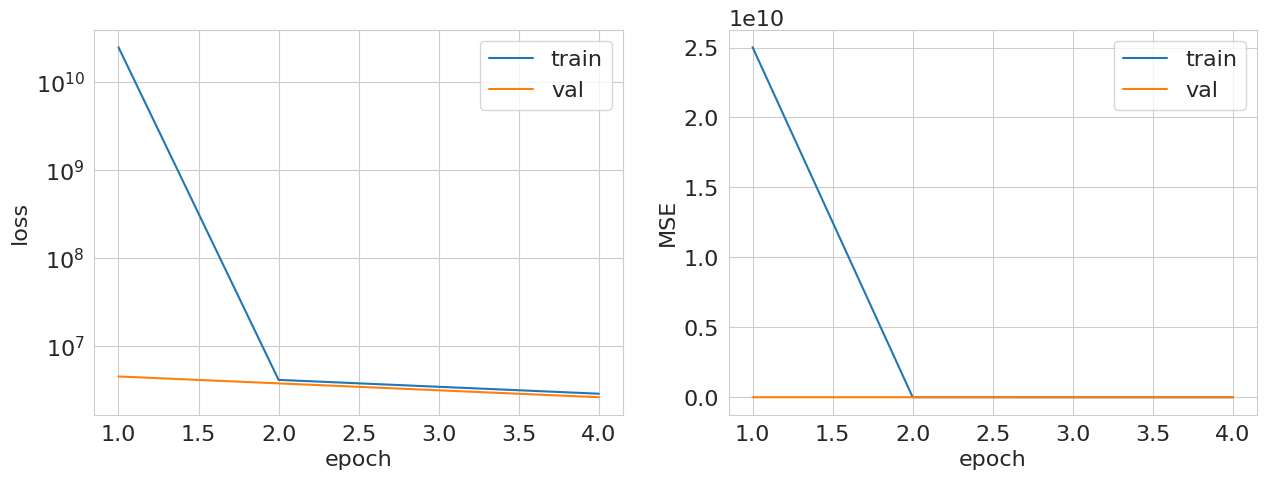

Train loss: 2864366.499
Train MSE: 2864366.499
Validation loss: 2612640.232
Validation MSE: 2612640.232


In [ ]:
train_mse, val_mse = train_and_validate(model3, optimizer, criterion, metric, train_loader, val_loader, num_epochs)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** Обучение стабилизировать не удалось, не помогло и уменьшение `lr`. Классификация оказалась лучше регрессии в данном случае. Похоже, что несбалансированность наблюдений по годам делает своё дело. Но так же можно заметить, что признаки слишком разные по модулю.

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [ ]:
min_train = np.min(y_train)
max_train = np.max(y_train)

In [ ]:
def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    return (sample - min_train) / (max_train - min_train)

def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    return sample * (max_train - min_train) + min_train

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений.

In [ ]:
batch_size = 64
in_features = X_train.shape[1]
hidden_size = 128
out_features = 1
num_epochs = 4

In [ ]:
train_loader = mm.DataLoader(X_train, normalize(y_train).reshape(-1,1), batch_size, shuffle=True)
val_loader = mm.DataLoader(X_val, normalize(y_val).reshape(-1,1), batch_size, shuffle=False)
model4 = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
optimizer = mm.SGD(model4, lr=1e-3)
criterion = mm.MSELoss()
metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))

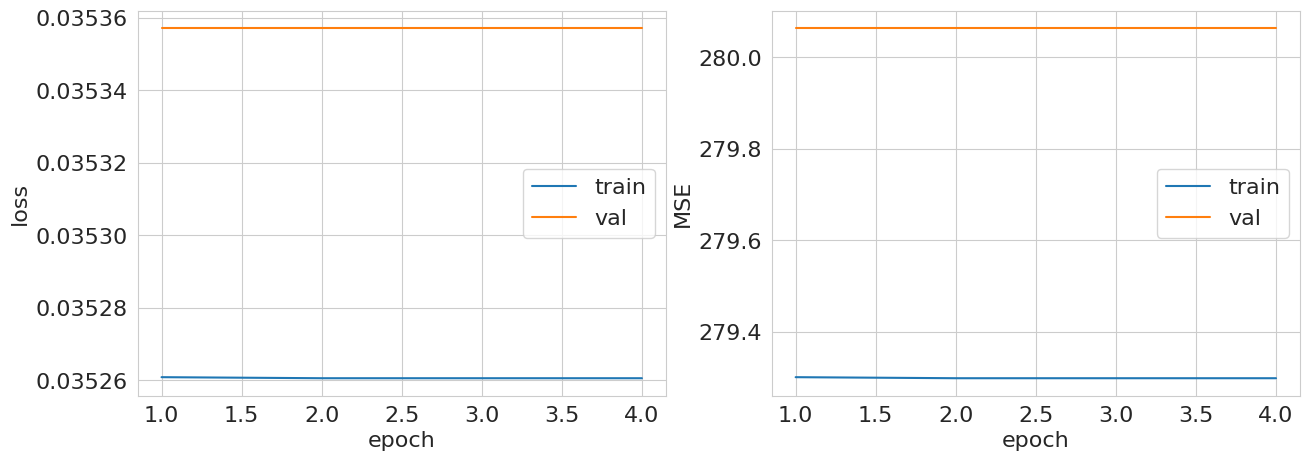

Train loss: 0.035
Train MSE: 279.299
Validation loss: 0.035
Validation MSE: 280.064


In [ ]:
train_mse, val_mse = train_and_validate(model4, optimizer, criterion, metric, train_loader, val_loader, num_epochs)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском.

**Ответ:** Ооо, теперь всё стало гораздо лучше, правда всё равно бейзлайн не побит.

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

batch_size = 64
in_features = X_train.shape[1]
hidden_size = 128
out_features = 1
num_epochs = 8

train_loader = mm.DataLoader(scaler.fit_transform(X_train), normalize(y_train).reshape(-1,1), batch_size, shuffle=True)
val_loader = mm.DataLoader(scaler.fit_transform(X_val), normalize(y_val).reshape(-1,1), batch_size, shuffle=False)
model5 = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
optimizer = mm.SGD(model5, lr=1e-1)
criterion = mm.MSELoss()
metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))

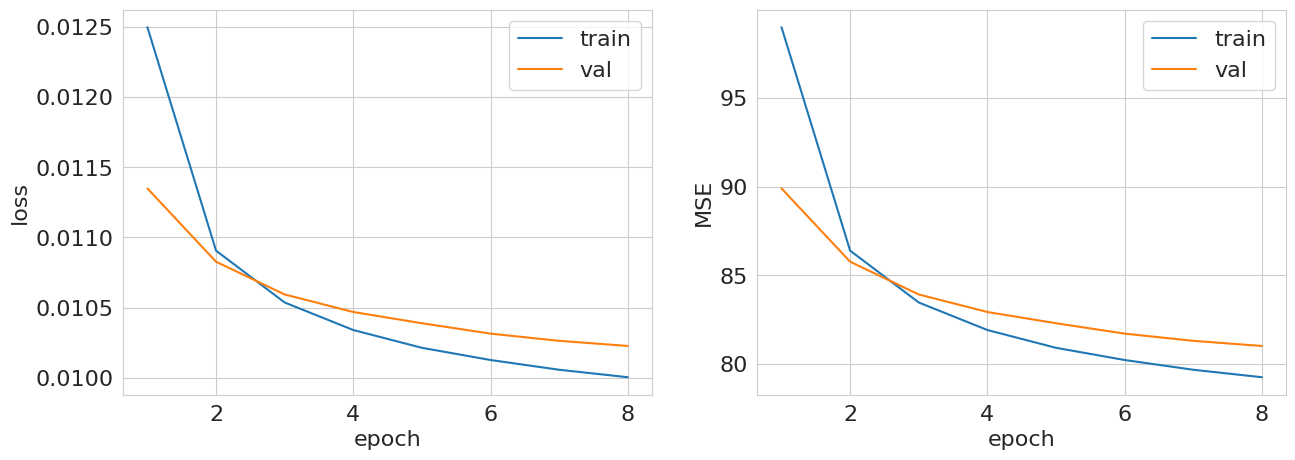

Train loss: 0.010
Train MSE: 79.241
Validation loss: 0.010
Validation MSE: 81.006


In [ ]:
train_mse, val_mse = train_and_validate(model5, optimizer, criterion, metric, train_loader, val_loader, num_epochs)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества. В заданиях 2.1-2.3 **запускайте эксперименты несколько раз (4-5)** с одинаковыми значениями гиперпараметров обучения, но с разными случайными инициализациями сети (достаточно просто прогнать код с инициализацией модели и ее обучением в цикле: каждый вызов конструктора инициализирует модель случайно). Для сравнения качества разных экспериментов **отрисовывайте ящики с усами (boxplot)** по этим нескольким запускам.

Задание 2.4 требует перебора гиперпараметров, в нем запускайте эксперимент по одному разу для каждого рассмотренного значения, чтобы сэкономить время.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

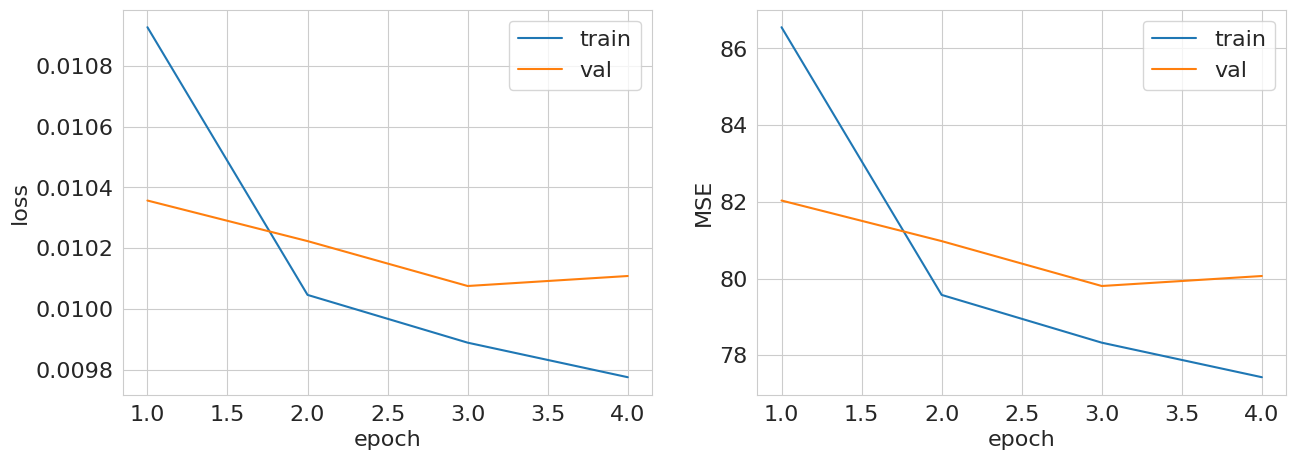

Train loss: 0.010
Train MSE: 77.426
Validation loss: 0.010
Validation MSE: 80.065


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

batch_size = 64
in_features = X_train.shape[1]
hidden_size = 128
out_features = 1
num_epochs = 4

train_loader = mm.DataLoader(scaler.fit_transform(X_train), normalize(y_train).reshape(-1,1), batch_size, shuffle=True)
val_loader = mm.DataLoader(scaler.fit_transform(X_val), normalize(y_val).reshape(-1,1), batch_size, shuffle=False)
criterion = mm.MSELoss()
train_res, val_res = [], []
for _ in range(5):
    model6 = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.SGD(model6, lr=1e-1, momentum=0.9) # возьмём как на лекции
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    train_mse, val_mse = train_and_validate(model6, optimizer, criterion, metric, train_loader, val_loader, num_epochs)
    train_res.append(train_mse)
    val_res.append(val_mse)

[Text(0.5, 0, 'Val MSE')]

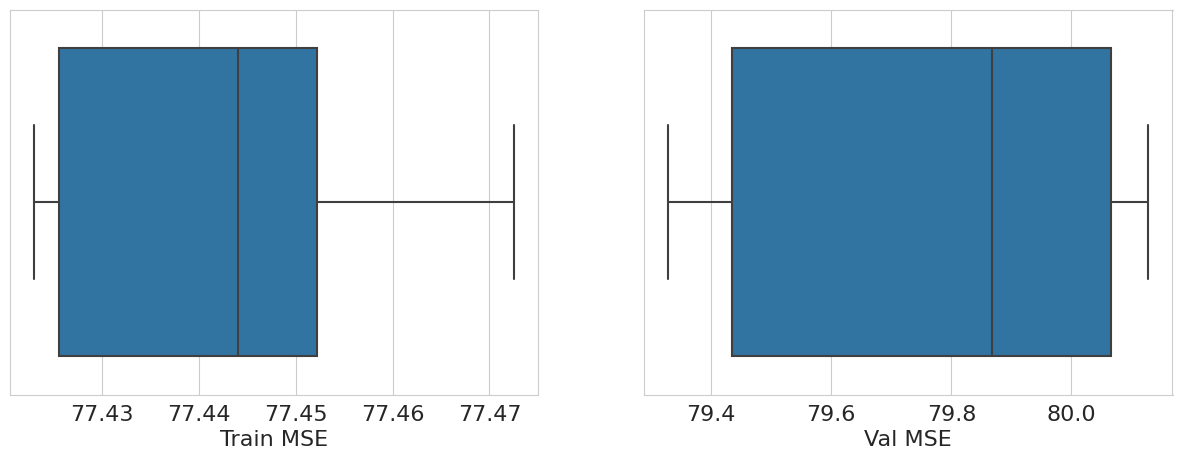

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(ax=axes[0], x=train_res)
axes[0].set(xlabel='Train MSE')
sns.boxplot(ax=axes[1], x=val_res)
axes[1].set(xlabel='Val MSE')

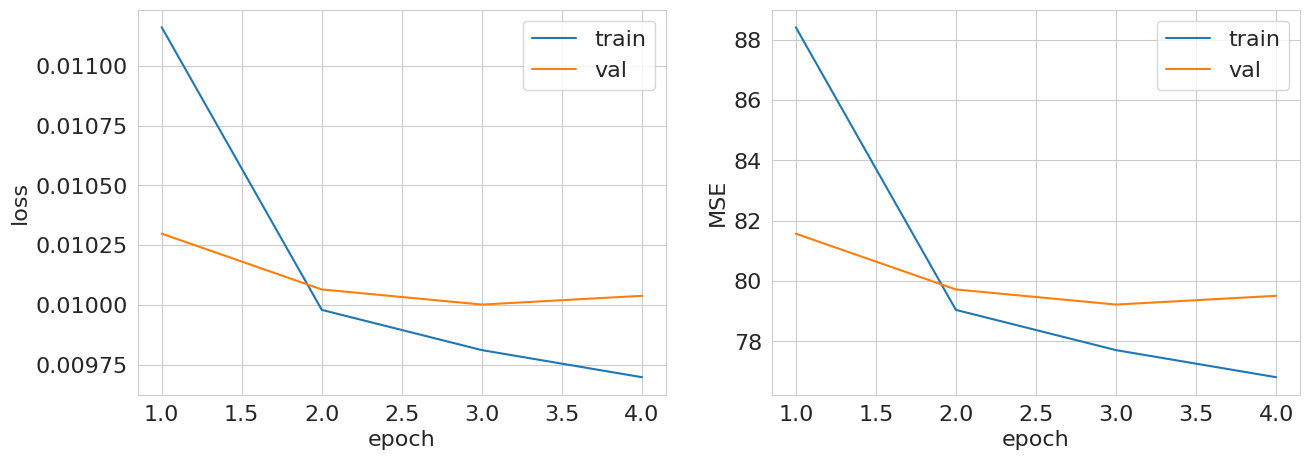

Train loss: 0.010
Train MSE: 76.817
Validation loss: 0.010
Validation MSE: 79.513


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

batch_size = 64
in_features = X_train.shape[1]
hidden_size = 128
out_features = 1
num_epochs = 4
train_res, val_res = [], []
train_loader = mm.DataLoader(scaler.fit_transform(X_train), normalize(y_train).reshape(-1,1), batch_size, shuffle=True)
val_loader = mm.DataLoader(scaler.fit_transform(X_val), normalize(y_val).reshape(-1,1), batch_size, shuffle=False)
for _ in range(5):
    model7 = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model7, lr=1e-3)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    train_mse, val_mse = train_and_validate(model7, optimizer, criterion, metric, train_loader, val_loader, num_epochs)
    train_res.append(train_mse)
    val_res.append(val_mse)

[Text(0.5, 0, 'Val MSE')]

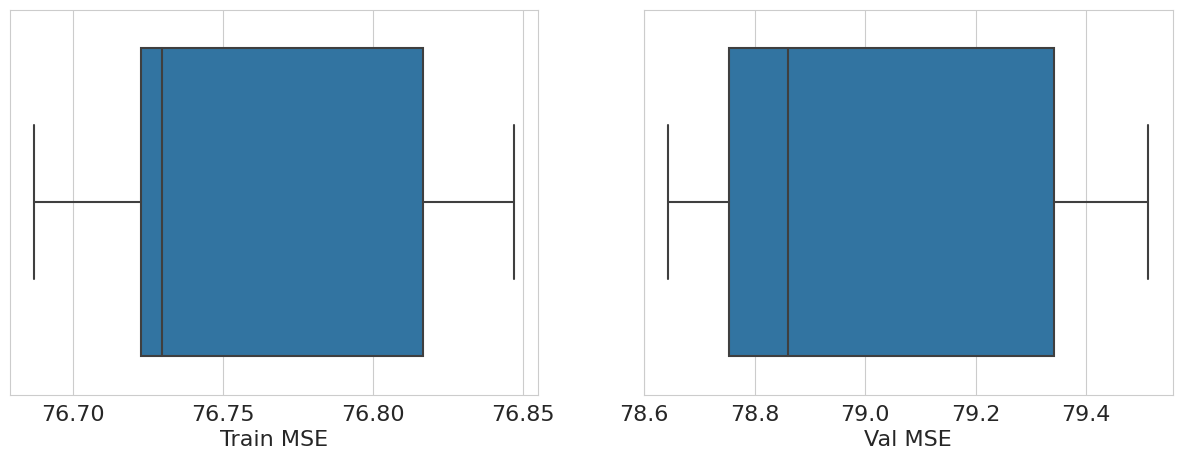

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(ax=axes[0], x=train_res)
axes[0].set(xlabel='Train MSE')
sns.boxplot(ax=axes[1], x=val_res)
axes[1].set(xlabel='Val MSE')

**Ответ**: Видим, что у Адама как-то получше с ошибкой, по скорости обучения ничего не могу сказать.

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

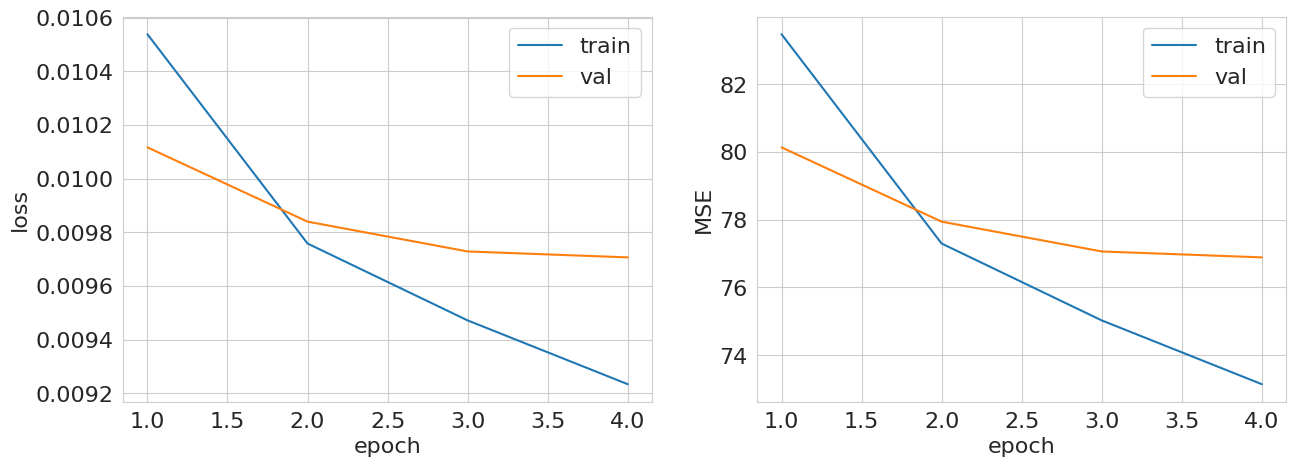

Train loss: 0.009
Train MSE: 73.141
Validation loss: 0.010
Validation MSE: 76.885


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

batch_size = 64
in_features = X_train.shape[1]
hidden_size = 256
out_features = 1
num_epochs = 4
train_res, val_res = [], []
train_loader = mm.DataLoader(scaler.fit_transform(X_train), normalize(y_train).reshape(-1,1), batch_size, shuffle=True)
val_loader = mm.DataLoader(scaler.fit_transform(X_val), normalize(y_val).reshape(-1,1), batch_size, shuffle=False)
for _ in range(5):
    model8 = mm.Sequential(mm.Linear(in_features, hidden_size), mm.ReLU(), mm.Linear(hidden_size, hidden_size),mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model8, lr=1e-3)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    train_mse, val_mse = train_and_validate(model8, optimizer, criterion, metric, train_loader, val_loader, num_epochs)
    train_res.append(train_mse)
    val_res.append(val_mse)

[Text(0.5, 0, 'Val MSE')]

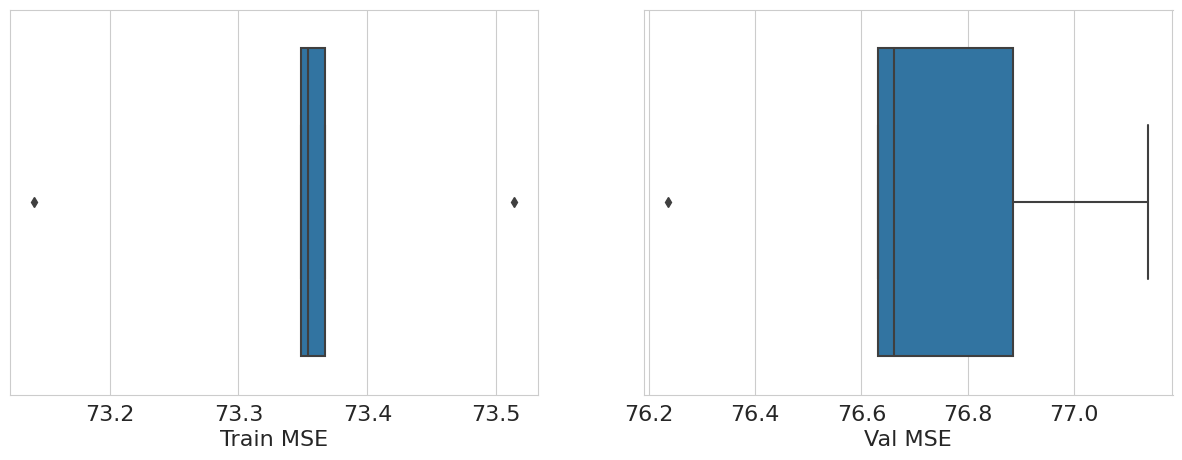

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(ax=axes[0], x=train_res)
axes[0].set(xlabel='Train MSE')
sns.boxplot(ax=axes[1], x=val_res)
axes[1].set(xlabel='Val MSE')

**Ответ**: чуть сильнее начали переобучаться, но качество на валидационной выборке стало получше.

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

Опишите результаты экспериментов.

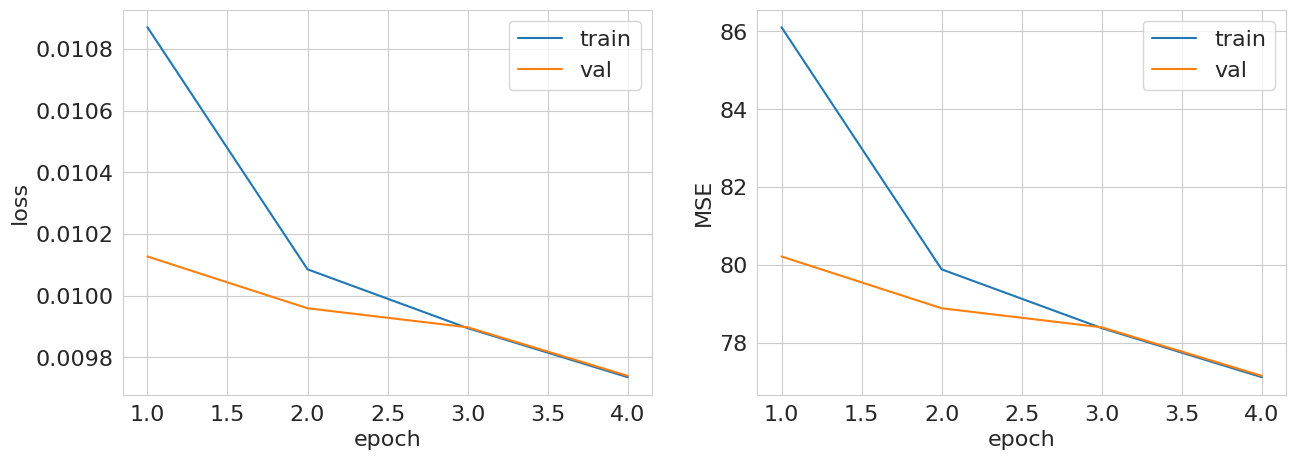

Train loss: 0.010
Train MSE: 77.117
Validation loss: 0.010
Validation MSE: 77.152


In [ ]:
# dropout

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

batch_size = 64
in_features = X_train.shape[1]
hidden_size = 256
out_features = 1
num_epochs = 4
p = 0.2
train_res, val_res = [], []
train_loader = mm.DataLoader(scaler.fit_transform(X_train), normalize(y_train).reshape(-1,1), batch_size, shuffle=True)
val_loader = mm.DataLoader(scaler.fit_transform(X_val), normalize(y_val).reshape(-1,1), batch_size, shuffle=False)
for _ in range(3):
    model9 = mm.Sequential(mm.Linear(in_features, hidden_size),mm.Dropout(p), mm.ReLU(), mm.Linear(hidden_size, hidden_size), mm.Dropout(p), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model9, lr=1e-3)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    train_mse, val_mse = train_and_validate(model9, optimizer, criterion, metric, train_loader, val_loader, num_epochs)
    train_res.append(train_mse)
    val_res.append(val_mse)

[Text(0.5, 0, 'Val MSE')]

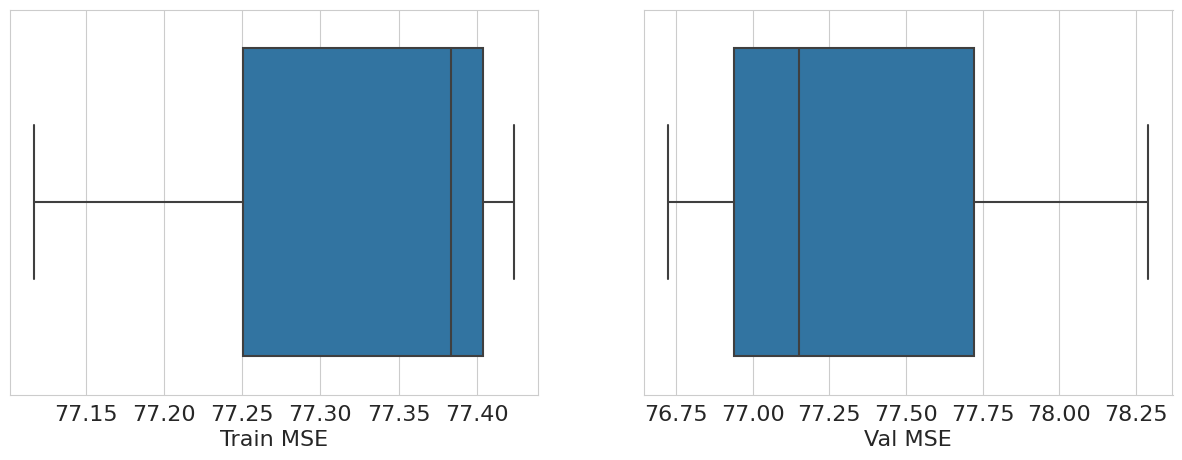

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(ax=axes[0], x=train_res)
axes[0].set(xlabel='Train MSE')
sns.boxplot(ax=axes[1], x=val_res)
axes[1].set(xlabel='Val MSE')

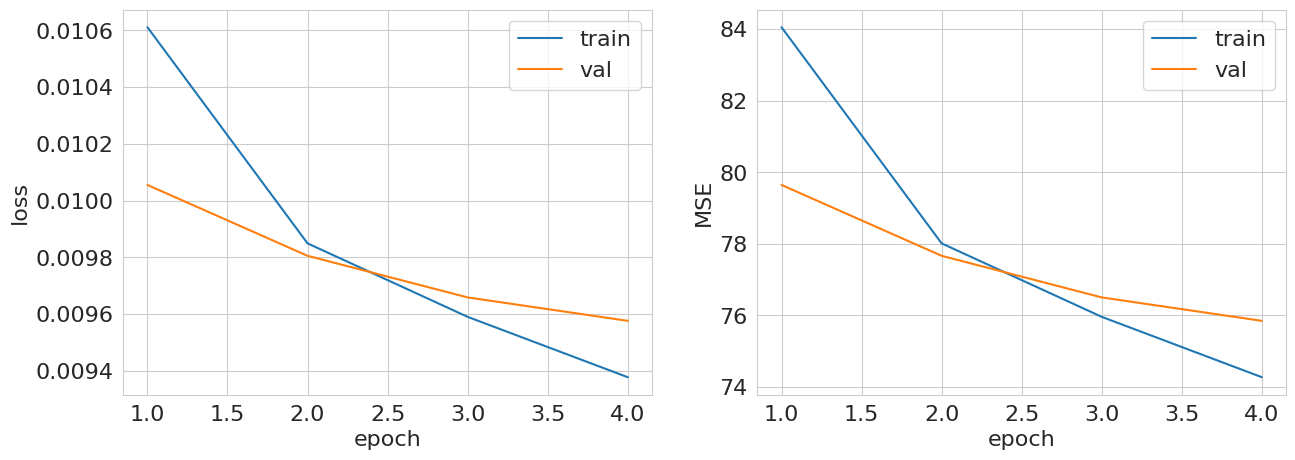

Train loss: 0.009
Train MSE: 74.274
Validation loss: 0.010
Validation MSE: 75.849


In [ ]:
# batchnorm

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

batch_size = 64
in_features = X_train.shape[1]
hidden_size = 256
out_features = 1
num_epochs = 4
train_res, val_res = [], []
train_loader = mm.DataLoader(scaler.fit_transform(X_train), normalize(y_train).reshape(-1,1), batch_size, shuffle=True)
val_loader = mm.DataLoader(scaler.fit_transform(X_val), normalize(y_val).reshape(-1,1), batch_size, shuffle=False)
for _ in range(3):
    model10 = mm.Sequential(mm.Linear(in_features, hidden_size),mm.BatchNormalization(hidden_size), mm.ReLU(), mm.Linear(hidden_size, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model10, lr=1e-3)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    train_mse, val_mse = train_and_validate(model10, optimizer, criterion, metric, train_loader, val_loader, num_epochs)
    train_res.append(train_mse)
    val_res.append(val_mse)

[Text(0.5, 0, 'Val MSE')]

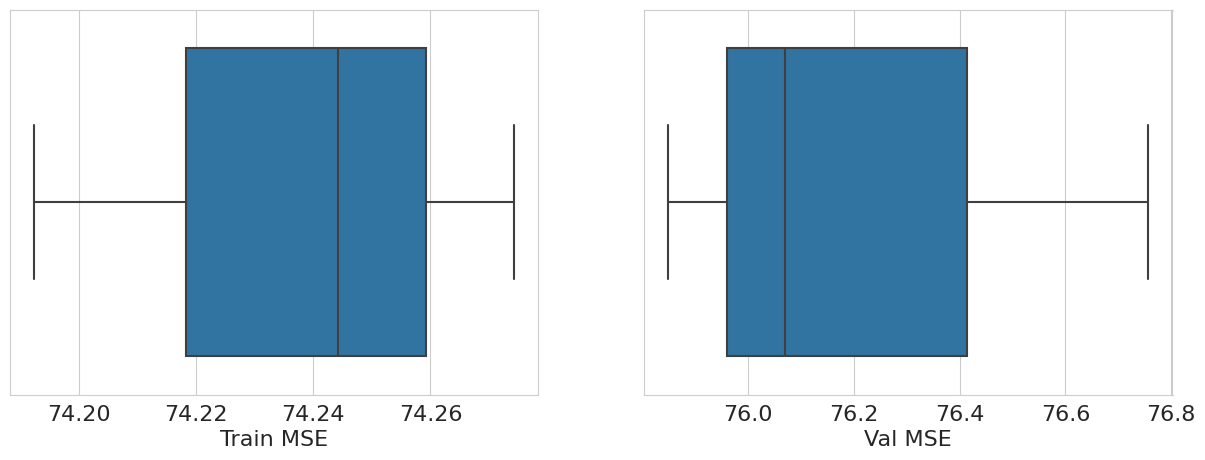

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(ax=axes[0], x=train_res)
axes[0].set(xlabel='Train MSE')
sns.boxplot(ax=axes[1], x=val_res)
axes[1].set(xlabel='Val MSE')

Получили, что batch-нормализация даёт лучший результат.

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`. Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [ ]:
from sklearn.preprocessing import StandardScaler

lr_grid = np.logspace(-5, -2, 4)

train_loader = mm.DataLoader(scaler.fit_transform(X_train), normalize(y_train).reshape(-1,1), batch_size, shuffle=True)
val_loader = mm.DataLoader(scaler.fit_transform(X_val), normalize(y_val).reshape(-1,1), batch_size, shuffle=False)

train_res_lr, val_res_lr = [], []

for lr in lr_grid:
    scaler = StandardScaler()
    batch_size = 64
    in_features = X_train.shape[1]
    hidden_size = 256
    out_features = 1
    num_epochs = 4
    model11 = mm.Sequential(mm.Linear(in_features, hidden_size),mm.BatchNormalization(hidden_size), mm.ReLU(), mm.Linear(hidden_size, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model11, lr=lr)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    train_mse, val_mse = train_and_validate(model11, optimizer, criterion, metric, train_loader, val_loader, num_epochs, verbose=False)
    train_res_lr.append(train_mse)
    val_res_lr.append(val_mse)
    print(f'For lr = {lr} train mse = {train_mse} and validation mse = {val_mse}')

For lr = 1e-05 train mse = 83.64942312617625 and validation mse = 84.292496199364
For lr = 0.0001 train mse = 74.69186243094858 and validation mse = 77.4355710340244
For lr = 0.001 train mse = 74.20895623232684 and validation mse = 76.209914217284
For lr = 0.01 train mse = 76.29714177508927 and validation mse = 76.74244718926211


In [ ]:
train_res_lr = np.array(train_res_lr)
val_res_lr = np.array(val_res_lr)
best_lr = lr_grid[np.argmin(val_res_lr)]
train_mse_for_best_lr = train_res_lr[np.argmin(val_res_lr)]
val_mse_for_best_lr = np.min(val_res_lr)
best_lr

0.001

In [ ]:
# best_lr=0.001

from sklearn.preprocessing import StandardScaler

weight_decay_grid = np.logspace(-6, -3, 4)

train_loader = mm.DataLoader(scaler.fit_transform(X_train), normalize(y_train).reshape(-1,1), batch_size, shuffle=True)
val_loader = mm.DataLoader(scaler.fit_transform(X_val), normalize(y_val).reshape(-1,1), batch_size, shuffle=False)

train_res_wd, val_res_wd = [], []

for weight_decay in weight_decay_grid:
    scaler = StandardScaler()
    batch_size = 64
    in_features = X_train.shape[1]
    hidden_size = 256
    out_features = 1
    num_epochs = 4
    model12 = mm.Sequential(mm.Linear(in_features, hidden_size),mm.BatchNormalization(hidden_size), mm.ReLU(), mm.Linear(hidden_size, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
    optimizer = mm.Adam(model12, lr=best_lr, weight_decay=weight_decay)
    criterion = mm.MSELoss()
    metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
    train_mse, val_mse = train_and_validate(model12, optimizer, criterion, metric, train_loader, val_loader, num_epochs, verbose=False)
    train_res_wd.append(train_mse)
    val_res_wd.append(val_mse)
    print(f'For weight decay = {weight_decay} train mse = {train_mse} and validation mse = {val_mse}')

weight_decay_grid = np.append(weight_decay_grid, 0)
train_res_wd = np.array(train_res_wd)
val_res_wd = np.array(val_res_wd)
train_res_wd = np.append(train_res_wd, train_mse_for_best_lr)
val_res_wd = np.append(val_res_wd, val_mse_for_best_lr)

print(f'For weight decay = {0} train mse = {train_mse_for_best_lr} and validation mse = {val_mse_for_best_lr}')

For weight decay = 1e-06 train mse = 74.9648485313392 and validation mse = 77.27119886196472
For weight decay = 1e-05 train mse = 77.54411676561969 and validation mse = 78.22626853488855
For weight decay = 0.0001 train mse = 80.8756256120291 and validation mse = 80.6208091080672
For weight decay = 0.001 train mse = 84.4457599306236 and validation mse = 84.71812532608061
For weight decay = 0 train mse = 74.20895623232684 and validation mse = 76.209914217284


In [ ]:
best_weight_decay = weight_decay_grid[np.argmin(val_res_wd)]
best_weight_decay

0.0

[Text(0.5, 0, 'weight decay'), Text(0, 0.5, 'Val MSE')]

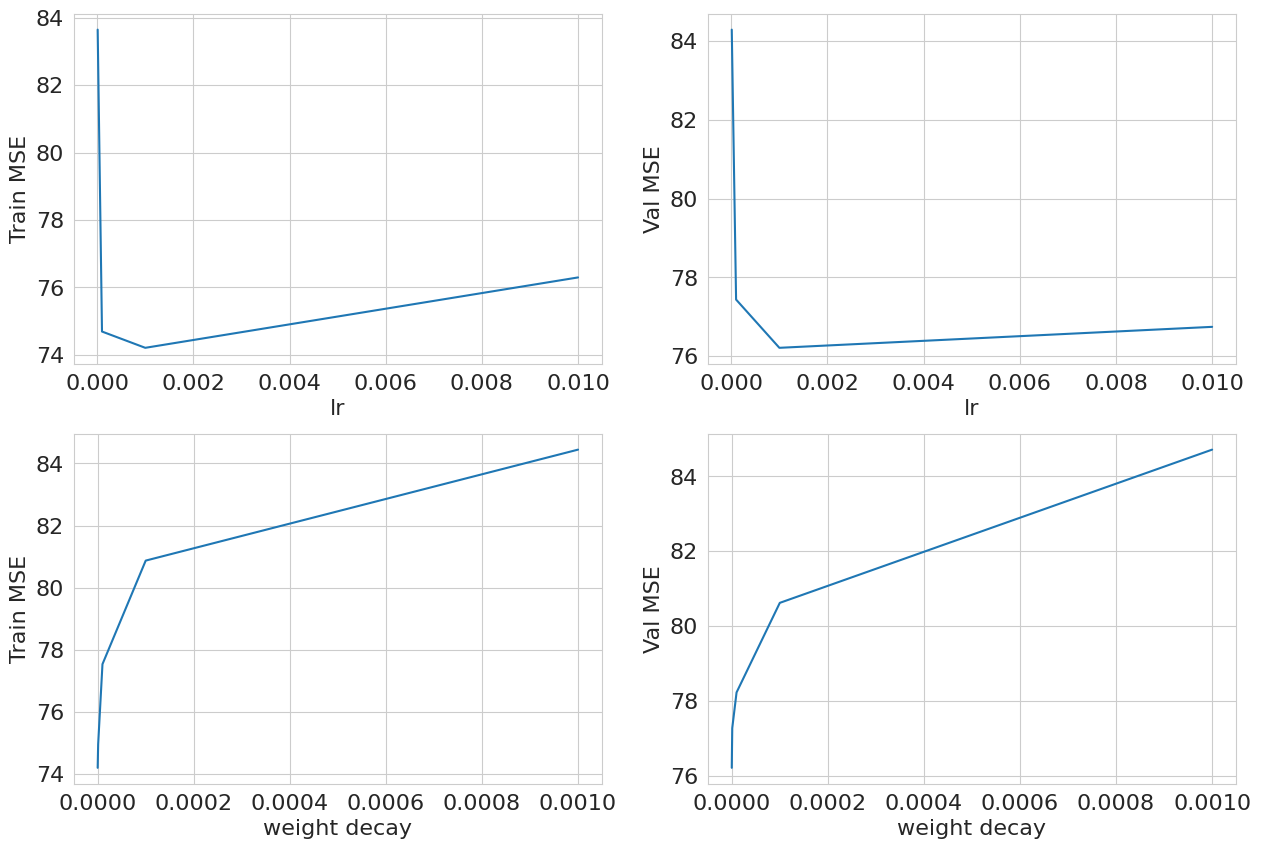

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(15,10))

sns.lineplot(ax=axes[0,0], x=lr_grid, y=train_res_lr).set(xlabel='lr', ylabel='Train MSE')
sns.lineplot(ax=axes[0,1], x=lr_grid, y=val_res_lr).set(xlabel='lr', ylabel='Val MSE')
sns.lineplot(ax=axes[1,0], x=weight_decay_grid, y=train_res_wd).set(xlabel='weight decay', ylabel='Train MSE')
sns.lineplot(ax=axes[1,1], x=weight_decay_grid, y=val_res_wd).set(xlabel='weight decay', ylabel='Val MSE')

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это.

In [ ]:
#ещё раз сплитанём, чтобы train и validation смешались

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

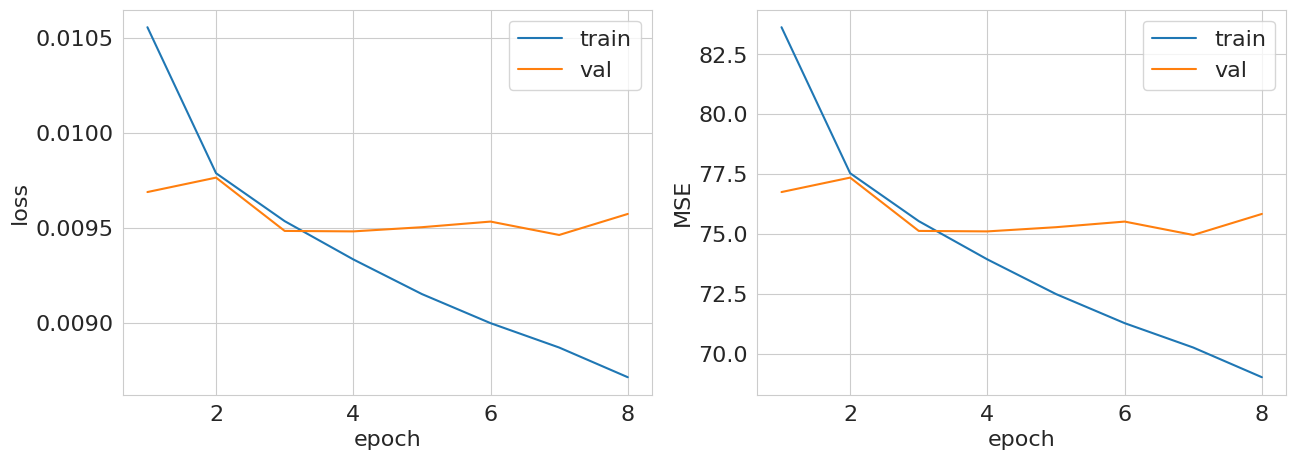

Train loss: 0.009
Train MSE: 69.019
Validation loss: 0.010
Validation MSE: 75.835


In [ ]:
# best_lr=0.001
# best_weight_decay=0


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

batch_size = 64
in_features = X_train.shape[1]
hidden_size = 256
out_features = 1
num_epochs = 8
min_train = np.min(y_train)
max_train = np.max(y_train)
train_loader = mm.DataLoader(scaler.fit_transform(X_train), normalize(y_train).reshape(-1,1), batch_size, shuffle=True)
test_loader = mm.DataLoader(scaler.fit_transform(X_test), normalize(y_test).reshape(-1,1), batch_size, shuffle=False)
model_last = mm.Sequential(mm.Linear(in_features, hidden_size),mm.BatchNormalization(hidden_size), mm.ReLU(), mm.Linear(hidden_size, hidden_size), mm.BatchNormalization(hidden_size), mm.ReLU(), mm.Linear(hidden_size, out_features), mm.Sigmoid())
optimizer = mm.Adam(model_last, lr=best_lr, weight_decay=best_weight_decay)
criterion = mm.MSELoss()
metric = lambda predictions, y_batch: mean_squared_error(denormalize(predictions), denormalize(y_batch))
train_mse, test_mse = train_and_validate(model_last, optimizer, criterion, metric, train_loader, test_loader, num_epochs)